# Autoencoder

# Setup

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Download Dataset and preprocess

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the Autoencoder

In [3]:
encoding_dim = 32
input_img = Input(shape=(784,))
x1 = Dense(256, activation='relu')(input_img)  
x2 = Dense(64, activation='relu')(x1)  
encoded = Dense(encoding_dim, activation='relu')(x2) 
x3 = Dense(64, activation='relu')(encoded)
x4 = Dense(256, activation='relu')(x3)  
decoded = Dense(784, activation='sigmoid')(x4) 
autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()  

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488

# Train the Autoencoder

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=150,    
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/150
235/235 [==============================] - 2s 8ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 2/150
235/235 [==============================] - 2s 8ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 3/150
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 4/150
235/235 [==============================] - 2s 7ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 5/150
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 6/150
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 7/150
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 8/150
235/235 [==============================] - 2s 7ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 9/150
235/235 [==============================] - 2s 7ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 10/150
235/235 [==============================] - 2s 8ms/step - loss: 0.6924 - val_lo

# Convert test image with training model

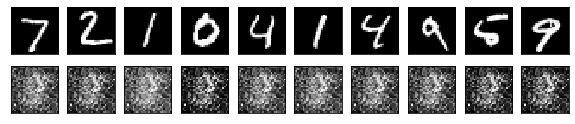

In [5]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(10, 2))
for i in range(n):
    # テスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()